In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [2]:
m = 60_000

In [3]:
X_train, X_test, y_train, y_test = X[:m], X[m:], y[:m], y[m:]

In [4]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# found during grid search
best_params = {'n_neighbors': 4, 'weights': 'distance'}

knn_clf = KNeighborsClassifier(**best_params)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [6]:
from sklearn.metrics import accuracy_score

y_pred = knn_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.9714

In [7]:
y_pred.shape

(10000,)

In [8]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(knn_clf, X_train, y_train, cv=5)
# scores

In [9]:
# from sklearn.model_selection import cross_val_predict

# y_pred_cv = cross_val_predict(knn_clf, X_train, y_train, cv=5)

In [10]:
# y_pred_cv.shape

In [11]:
# from sklearn.metrics import confusion_matrix

# confusion_matrix(y_pred_cv, y_train)

In [12]:
# knn_clf.get_params()

In [13]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'n_neighbors': [4, 5, 6],
#                 'weights': ['uniform', 'distance']}

# grid_search = GridSearchCV(knn_clf, parameters, cv=5, verbose=3)
# grid_search.fit(X_train, y_train)

In [14]:
# import joblib

# joblib.dump(grid_search, "knn.pkl")
# grid_search = joblib.load("knn.pkl")

In [15]:
# grid_search.best_params_
# best_params = {'n_neighbors': 4, 'weights': 'distance'}

In [16]:
# grid_search.best_score_

In [17]:
# y_pred = grid_search.predict(X_test)
# accuracy_score(y_test, y_pred)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [19]:
datagen = ImageDataGenerator(
    width_shift_range= 2.0,
    height_shift_range= 2.0,
    rotation_range = 20,
)

In [20]:
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

In [21]:
data_generator = datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1),shuffle=False, batch_size=1)

In [22]:
type(data_generator) 

tensorflow.python.keras.preprocessing.image.NumpyArrayIterator

In [23]:
X_train_aug = [data_generator.next() for i in range(0, m * 4)]

In [24]:
X_train_240k = np.asarray(X_train_aug).reshape(m * 4, 28 * 28)

In [25]:
X_train_240k.shape

(240000, 784)

In [26]:
X_train_ext = np.vstack((X_train, X_train_240k))

[]

<Figure size 432x288 with 0 Axes>

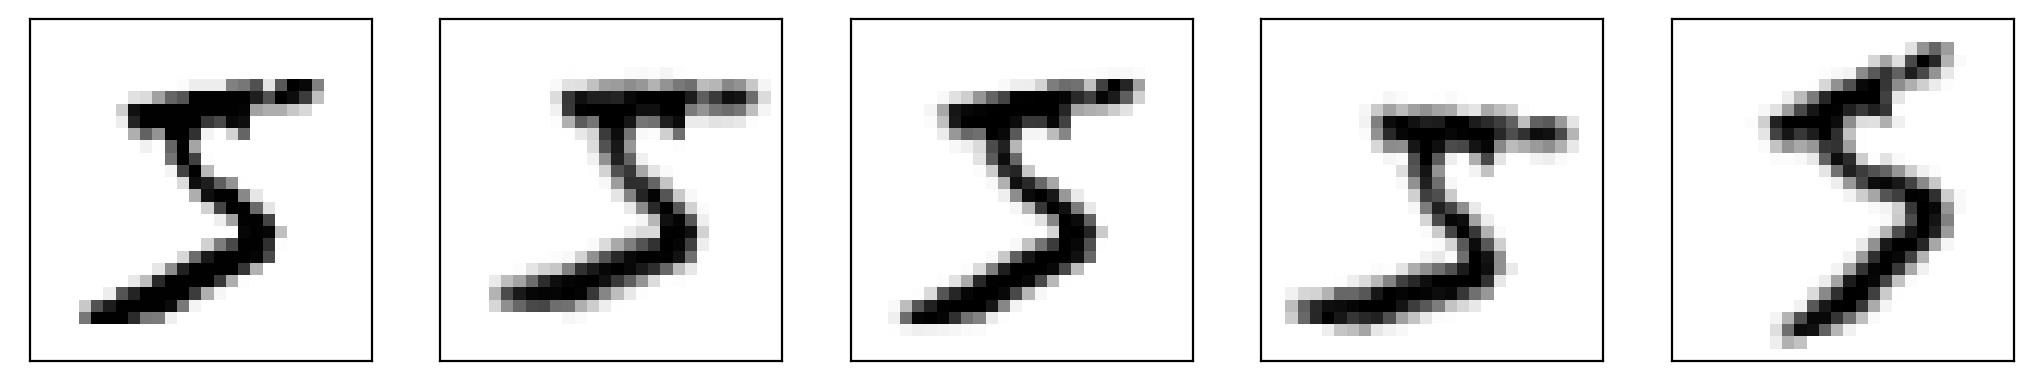

In [27]:
some = 0

plt.set_cmap('binary')
plt.figure(figsize=(12.8, 9.6), dpi=200)

plt.subplot(151)
plt.imshow(X_train_ext[some].reshape(28, 28))
plt.subplot(152)
plt.imshow(X_train_ext[some + m].reshape(28, 28))
plt.subplot(153)
plt.imshow(X_train_ext[some + m * 2].reshape(28, 28))
plt.subplot(154)
plt.imshow(X_train_ext[some + m * 3].reshape(28, 28))
plt.subplot(155)
plt.imshow(X_train_ext[some + m * 4].reshape(28, 28))

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

In [28]:
y_train_ext = np.concatenate((y_train, y_train, y_train, y_train, y_train))

In [29]:
# [y_train_ext[i] for i in range(0, m * 5, m)]

In [30]:
knn_clf.fit(X_train_ext, y_train_ext)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [31]:
y_pred_ext = knn_clf.predict(X_test)

In [32]:
scores_ext = accuracy_score(y_pred_ext, y_test)
scores_ext

0.976